# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


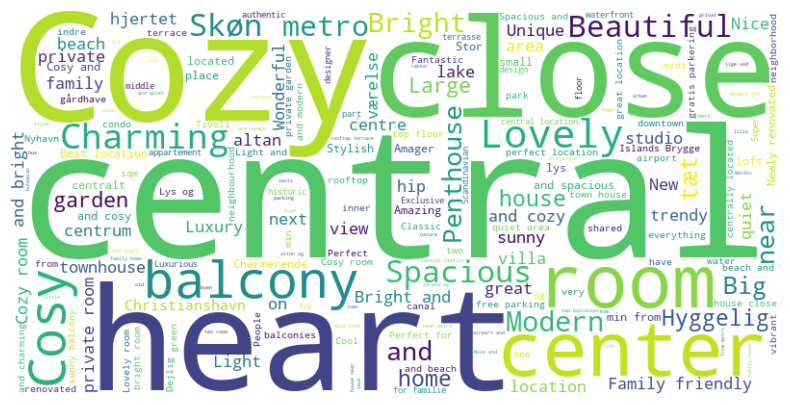

In [23]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

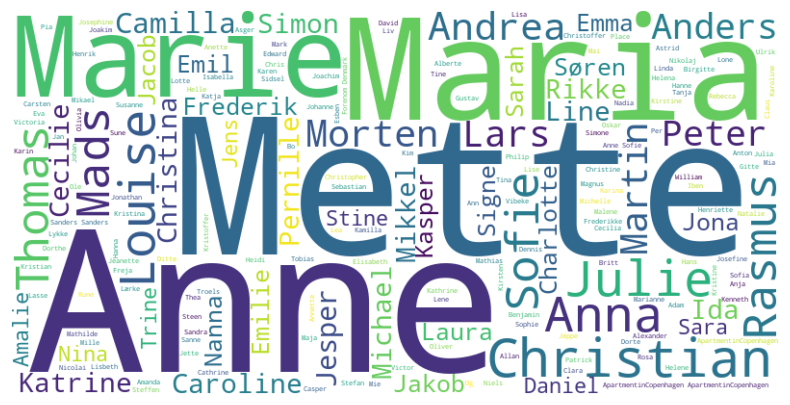

In [24]:
# Solution below

# Converting the host names to a simple string
host_names = ' '.join(data_filtered['host_name'].astype(str))

# creating and generating the word cloud with host names
hostname_wordcloud = WordCloud(background_color="white", width=800, height=400).generate(host_names)

# displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(hostname_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Yes it more or less corresponds to the names on the Top 20 female first names such as Mette, Anne, Maria, Charlotte, Ida, Louise as some of the most common names. Regarding the male first names several of the most used male names are present as well, such as Peter, Michael, Lars, Thomas, Mikkel, Anders, Mads, Rasmus m.m. which also corresponds to the assumption that the generated name-cloud from the renters registered on AirBnB in Copenhagen is well respresented on the most common danish male and female names list from DK statistics.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

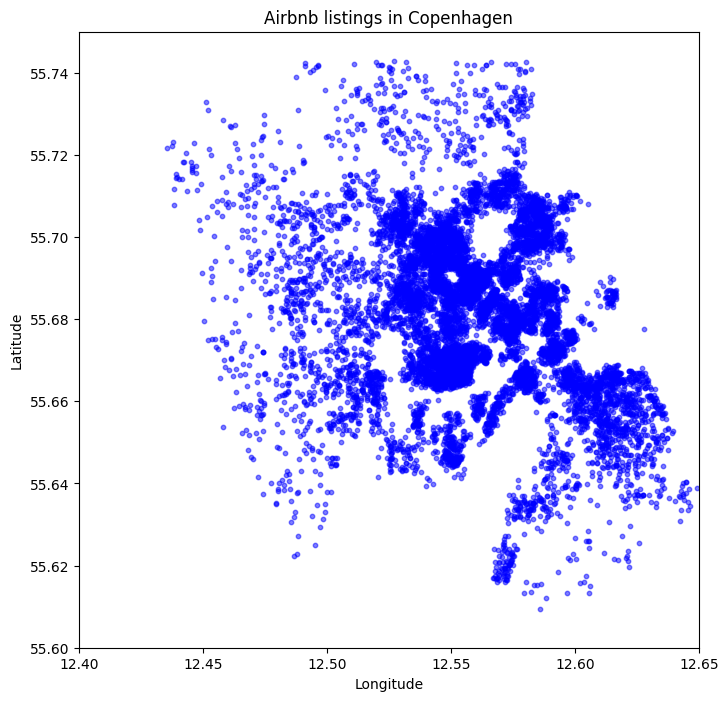

In [25]:
plt.figure(figsize=(8, 8))

# creating a scatter-plot with longitude and latitude, using alpha to show where there multiple listings in a tight spot
plt.scatter(data_filtered['longitude'], data_filtered['latitude'], alpha=0.5, c='blue', s=10)

# displaying the scatter plot
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Airbnb listings in Copenhagen')

# setting limits for the copenhagen area
plt.xlim(12.4, 12.65)
plt.ylim(55.6, 55.75)

plt.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

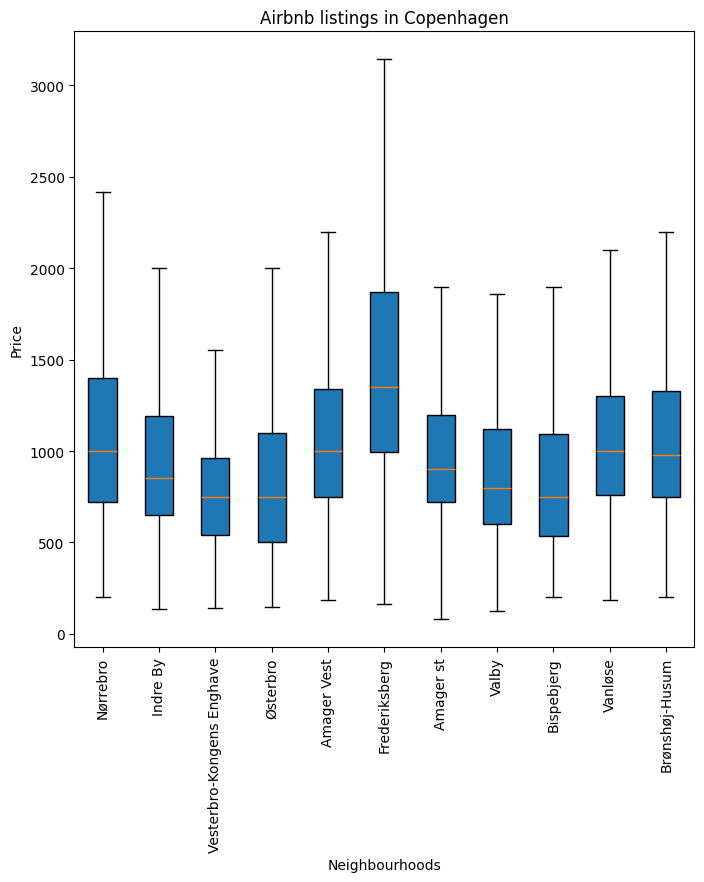

In [26]:
plt.figure(figsize=(8, 8))

# grouping data by 'neighbourhoods' and prices as lists
grouped_prices = [group["price"].values for name, group in data_filtered.groupby("neighbourhood_cleansed")]

# creating label for all neighbourhoods
labels = data_filtered["neighbourhood_cleansed"].unique()

# creating a box plot with neighbourhood and price, using alpha to show where there multiple listings in a tight spot
plt.boxplot(grouped_prices, tick_labels=labels, patch_artist=True, showfliers=False)

# displaying the plot
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.title('Airbnb listings in Copenhagen')
plt.xticks(rotation=90)
plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [27]:
# State your solution here. Add more cells if needed.

# I've chosen to work with neighbourhood and review_scores_rating, to see how the quality of the rentals varies throughout the neighbourhoods

# grouping data by neighbourhood
grouped_neighborhoods = data_filtered.groupby("neighbourhood_cleansed")

# Calculating statistics for price per neighbourhood
rating_stats = grouped_neighborhoods["review_scores_rating"].agg(["mean", "std", "median", "var", "min", "max", "count"]).reset_index()

# Calculating quartiles separately
rating_quartiles = grouped_neighborhoods["review_scores_rating"].quantile([0.25, 0.5, 0.75]).unstack()

# Adding quartiles to the table
rating_stats["25%"] = rating_quartiles[0.25].values
rating_stats["50%"] = rating_quartiles[0.5].values
rating_stats["75%"] = rating_quartiles[0.75].values

# Finding mode for room_type pr. neighbourhood
mode_room_type = grouped_neighborhoods["room_type"].agg(lambda x: x.mode().iloc[0])

# Adding 'room type' as extra analysis
rating_stats["most_common_room_type"] = mode_room_type.values

display(rating_stats)



,neighbourhood_cleansed,mean,std,median,var,min,max,count,25%,50%,75%,most_common_room_type
0,Amager Vest,4.815080,0.308644,4.90,0.095261,1.0,5.0,1059,4.7500,4.90,5.0,Entire home/apt
1,Amager st,4.798214,0.279165,4.87,0.077933,1.0,5.0,924,4.7000,4.87,5.0,Entire home/apt
2,Bispebjerg,4.796424,0.281760,4.89,0.079389,3.0,5.0,604,4.7000,4.89,5.0,Entire home/apt
3,Brønshøj-Husum,4.777789,0.292324,4.87,0.085453,3.0,5.0,285,4.6700,4.87,5.0,Entire home/apt
4,Frederiksberg,4.829167,0.283049,4.93,0.080117,0.0,5.0,1177,4.7500,4.93,5.0,Entire home/apt
5,Indre By,4.771903,0.290467,4.86,0.084371,2.0,5.0,1844,4.6700,4.86,5.0,Entire home/apt
6,Nørrebro,4.806155,0.262467,4.88,0.068889,2.5,5.0,2057,4.7100,4.88,5.0,Entire home/apt
7,Valby,4.766994,0.360935,4.88,0.130274,1.0,5.0,539,4.6700,4.88,5.0,Entire home/apt
8,Vanløse,4.773960,0.288201,4.83,0.083060,3.0,5.0,298,4.6725,4.83,5.0,Entire home/apt
9,Vesterbro-Kongens Enghave,4.828225,0.248275,4.91,0.061641,3.0,5.0,2034,4.7500,4.91,5.0,Entire home/apt


#### 1. High Average Ratings
**Frederiksberg** and **Vesterbro-Kongens Enghave** stand out with some of the highest average ratings at **4.82 and 4.83**.

This indicates that these neighborhoods generally have high-quality rentals and are popular among guests. Additionally, these areas have low variance (**0.08 and 0.06**), meaning that ratings are quite consistent.
**Amager Vest** and **Østerbro** also have relatively high average ratings at around **4.81**.

**Conclusion:** Overall, all neighborhoods score high, indicating that Airbnb rentals in Copenhagen maintain a stable and good standard.

#### 2. Variance and Spread of Ratings
**Valby** has the highest standard deviation (**0.36**) and variance (**0.13**), indicating that the quality of rentals varies considerably.

Although the average rating is still relatively high (**4.76**), guests may experience anything from very good to mediocre quality in this area.
**Vesterbro-Kongens Enghave** and **Frederiksberg**, on the other hand, have low variance, suggesting that nearly all properties in these areas receive good reviews.

**Conclusion:** For stable rentals with little variation in quality, neighborhoods with low variance, such as **Vesterbro** and **Frederiksberg**, are ideal choices.

#### 3. Median and Minimum Ratings
The median rating in most neighborhoods is close to **4.88 or higher**, indicating that more than half of the rentals in Copenhagen are rated very positively.
However, the minimum value of **0** in **Frederiksberg** suggests that some properties in this area may have had very poor guest experiences, likely due to isolated incidents.

**Conclusion:** While the average and median ratings are high, minimum ratings should not be overlooked, as they can indicate potential outliers or poor experiences.

#### 4. Room Type (most_common_room_type)
The most common room type across all neighborhoods is **"Entire home/apt"**.

**Conclusion:** Copenhagen seems to have a majority of listings consisting of entire homes or apartments rather than single rooms.

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [35]:
# State your solution here. Add more cells if needed.

# Choosing the relevant features
selected_features = data_filtered[["room_type", "number_of_reviews", "review_scores_rating", "price_category"]]

# Making room_type numeric with get_dummies()
selected_features = pd.get_dummies(selected_features, columns=["room_type"], drop_first=True)

# Removing NaN-values
selected_features = selected_features.dropna()

# Splitting data into features X and target Y
X = selected_features.drop("price_category", axis=1)
y = selected_features["price_category"]

# Splitting data into training and testdata (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training kNN-model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predicting on test data
y_pred = knn.predict(X_test)

# Evaluating the model
print("Accuracy:", knn.score(X_test, y_test))

print("\n Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.5655399835119538

 Classification Report
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1176
           1       0.58      0.60      0.59      1250

    accuracy                           0.57      2426
   macro avg       0.56      0.56      0.56      2426
weighted avg       0.57      0.57      0.57      2426



### **k-Nearest Neighbor Model Findings**

After training the kNN model with **`k=7`**, the model achieved an **accuracy of 56.6%**, showing limited predictive power.

---

### **Key Metrics:**
- **Precision:**
  - Affordable rentals (0): **55%**
  - Expensive rentals (1): **58%**

- **Recall:**
  - Affordable rentals (0): **53%**
  - Expensive rentals (1): **60%**

- **F1-score:**
  - Affordable rentals (0): **0.54**
  - Expensive rentals (1): **0.59**

---

### **Summary:**
- The model performs slightly better when predicting expensive rentals.
- The overall performance is quite poor and could be improved with:
  - Additional features (e.g., availability, minimum nights).
  - Feature scaling or normalization.
  - Tuning the value of **`k`** for better results.
